In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches

import missingno as msno

import scipy
from scipy import stats
from scipy.stats import shapiro, kstest, normaltest

In [51]:
#read the dataframe
df = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\capston_project 2\data\processed\cleaned_data.csv')
df.sample(5)

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,discretizatingAge,discretizatingIncome
2111,4369,1957,Master,66,Absurd,65487.0,0,0,2014-01-10,48,...,2,0,0,0,0,0,0,0,Older Adults,$34948.5 - $67793.5
2203,4478,1979,Graduation,44,Married,63777.0,1,1,2013-03-24,87,...,8,0,0,0,0,0,0,0,Early middle-aged adults,$34948.5 - $67793.5
1047,4491,1949,Master,74,Married,62845.0,1,1,2012-10-01,3,...,8,0,1,0,0,0,0,0,Older Adults,$34948.5 - $67793.5
1135,7755,1954,PhD,69,Married,57744.0,0,1,2013-11-12,91,...,8,0,0,0,0,0,0,0,Older Adults,$34948.5 - $67793.5
1471,9743,1955,Graduation,68,Married,76998.0,0,1,2013-01-11,85,...,6,0,0,1,0,0,0,0,Older Adults,> $67793.5


interval columns not set, guessing: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
interval columns not set, guessing: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']


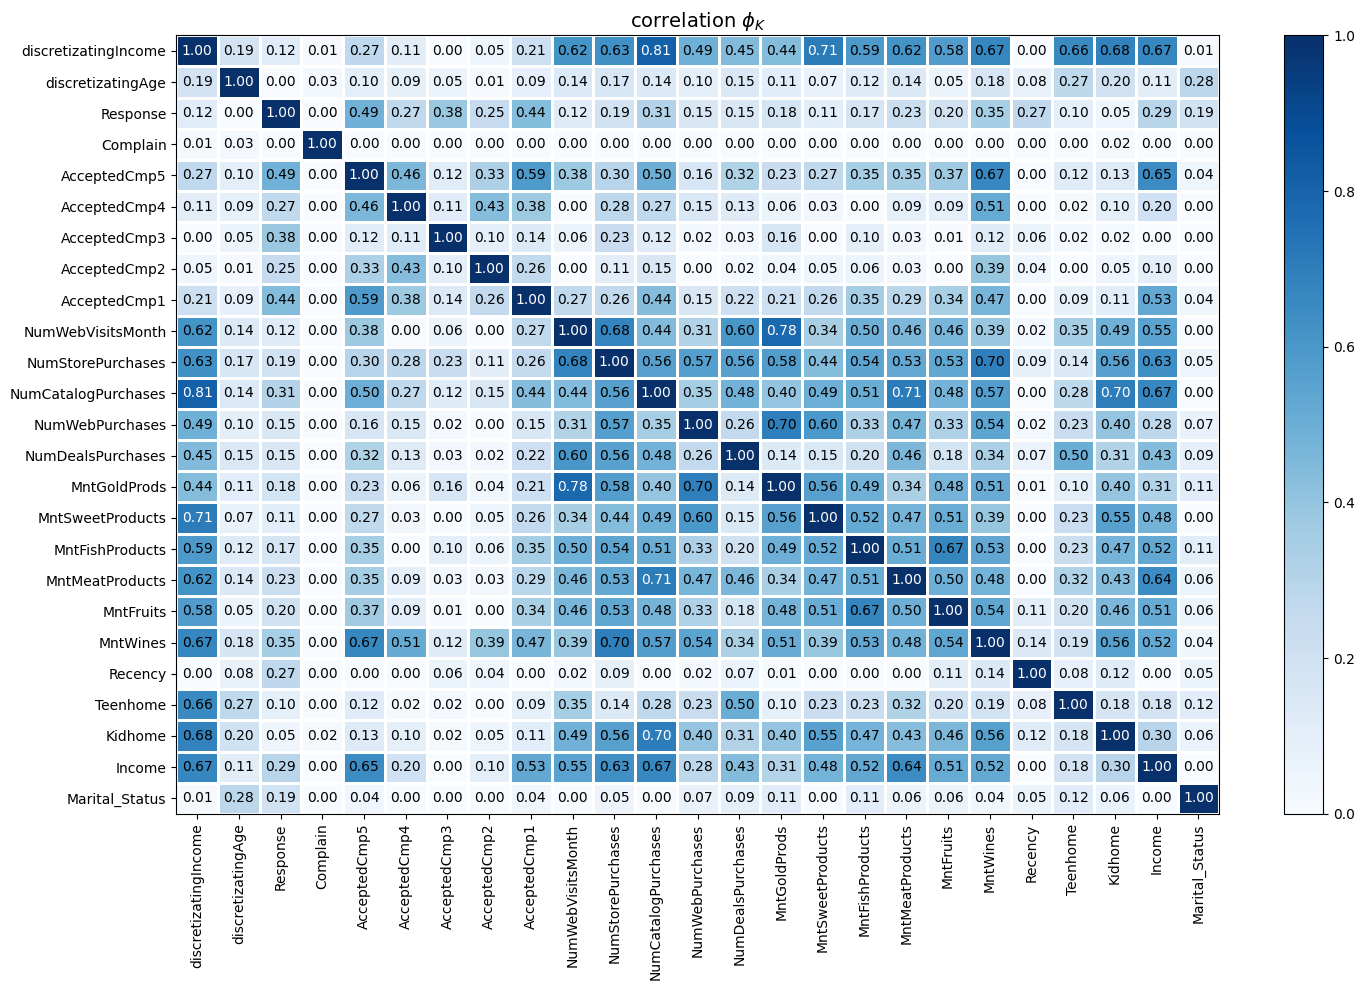

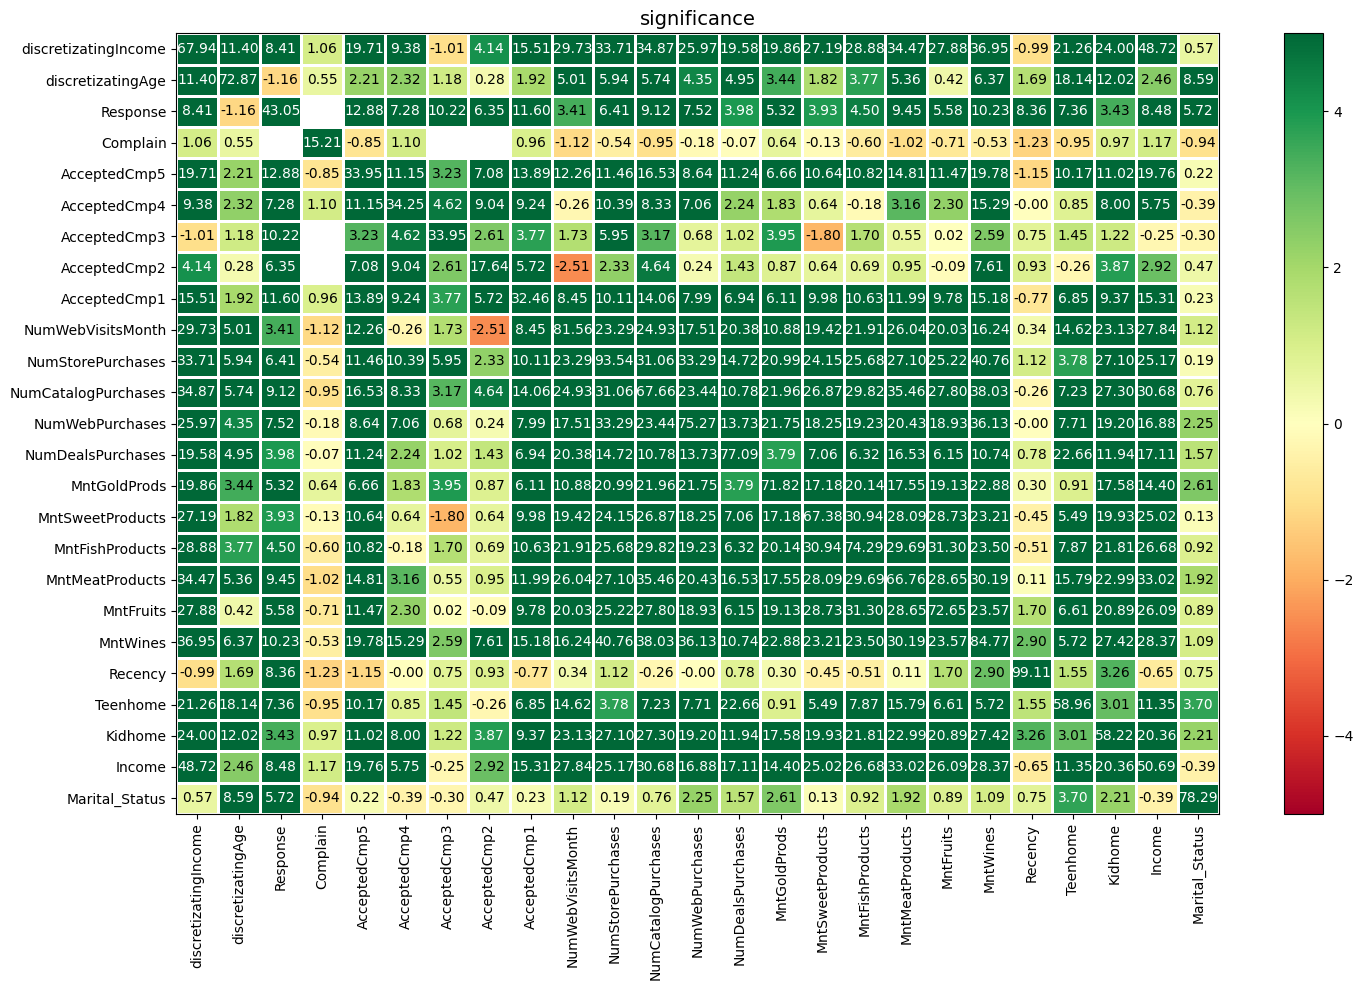

In [53]:
dftest = df[['Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'discretizatingAge', 'discretizatingIncome']]
phik_overview = dftest.phik_matrix()

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(15,10))

significance_overview = dftest.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1, figsize=(15,10))
plt.tight_layout()

In [42]:
# df[df['NumWebPurchases']].groupby(['discretizatingIncome']).agg('count')
dftest = df[['NumWebVisitsMonth', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'discretizatingAge', 'discretizatingIncome']]

table = pd.pivot_table(dftest, index=['discretizatingAge', 'discretizatingIncome'],
                       aggfunc=np.sum)
table

NumCatalogPurchases   
discretizatingAge        discretizatingIncome                        
Among young              $0 - $34948.5                          20  \
                         $34948.5 - $67793.5                    48   
                         > $67793.5                            216   
Early middle-aged adults $0 - $34948.5                         122   
                         $34948.5 - $67793.5                   604   
                         > $67793.5                            952   
Late middle-aged adults  $0 - $34948.5                          91   
                         $34948.5 - $67793.5                  1050   
                         > $67793.5                           1140   
Older Adults             $0 - $34948.5                          28   
                         $34948.5 - $67793.5                   729   
                         > $67793.5                            963   

                                               NumStorePurchases   
discretizatingAge        discretizatingIncome                      
Among young              $0 - $34948.5                       126  \
                         $34948.5 - $67793.5                 115   
                         > $67793.5                          285   
Early middle-aged adults $0 - $34948.5                       773   
                         $34948.5 - $67793.5                1811   
                         > $67793.5                         1449   
Late middle-aged adults  $0 - $34948.5                       560   
                         $34948.5 - $67793.5                2772   
                         > $67793.5                         1740   
Older Adults             $0 - $34948.5                       165   
                         $34948.5 - $67793.5                1871   
                         > $67793.5                         1303   

                                               NumWebPurchases   
discretizatingAge        discretizatingIncome                    
Among young              $0 - $34948.5                      75  \
                         $34948.5 - $67793.5                79   
                         > $67793.5                        150   
Early middle-aged adults $0 - $34948.5                     521   
                         $34948.5 - $67793.5              1374   
                         > $67793.5                        896   
Late middle-aged adults  $0 - $34948.5                     406   
                         $34948.5 - $67793.5              2104   
                         > $67793.5                       1143   
Older Adults             $0 - $34948.5                      95   
                         $34948.5 - $67793.5              1446   
                         > $67793.5                        861   

                                               NumWebVisitsMonth  
discretizatingAge        discretizatingIncome                     
Among young              $0 - $34948.5                       279  
                         $34948.5 - $67793.5                  89  
                         > $67793.5                           82  
Early middle-aged adults $0 - $34948.5                      1877  
                         $34948.5 - $67793.5                1874  
                         > $67793.5                          485  
Late middle-aged adults  $0 - $34948.5                      1315  
                         $34948.5 - $67793.5                2736  
                         > $67793.5                          693  
Older Adults             $0 - $34948.5                       353  
                         $34948.5 - $67793.5                1684  
                         > $67793.5                          442

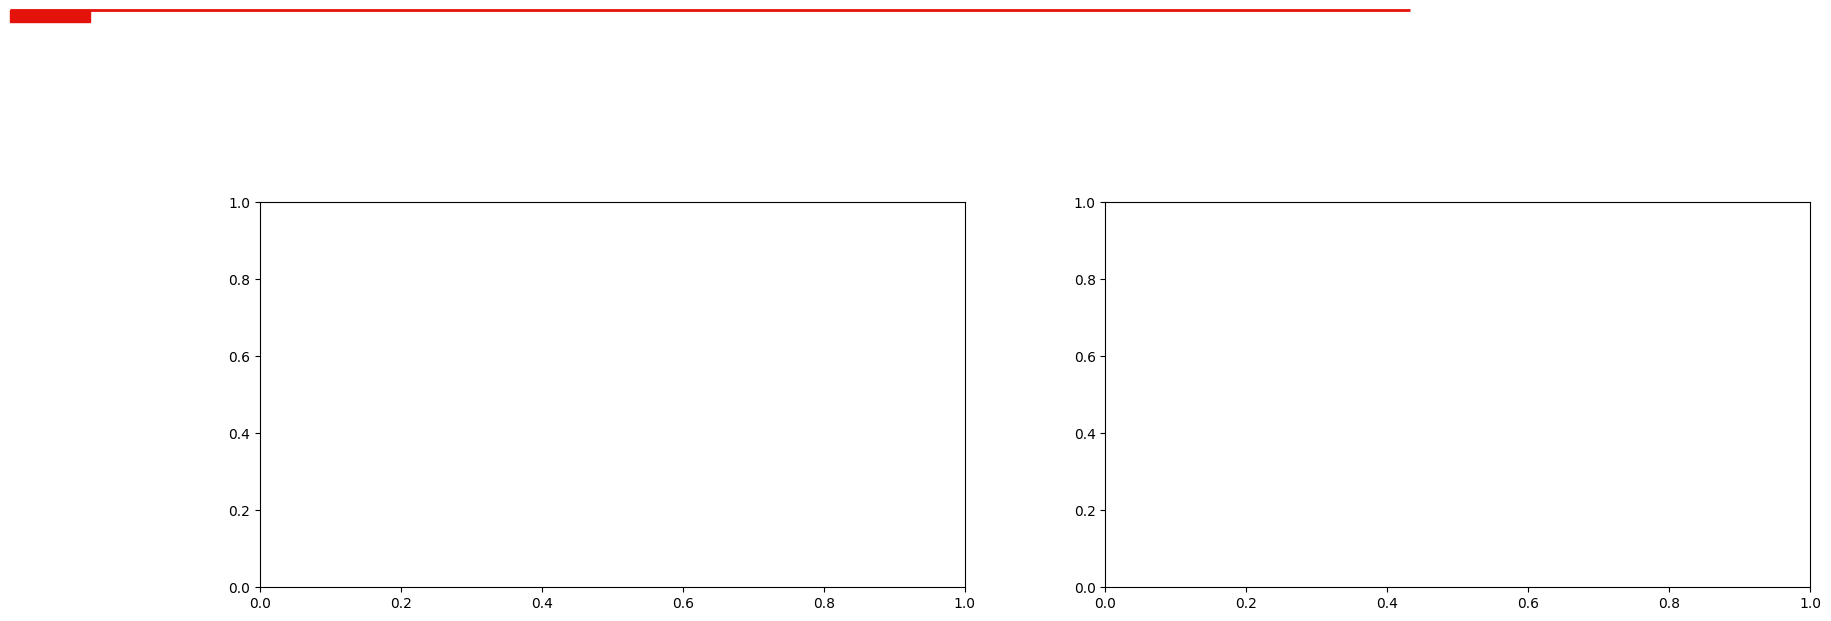

In [ ]:
# Inisialisasi parameter gambar
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))